<a href="https://colab.research.google.com/github/loechka/homeworks/blob/master/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0%20%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7%20(%D0%B4%D0%B7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import scipy
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ДВУСТОРОННЯЯ ГИПОТЕЗА
Представим, что мы испытываем лекарство против простуды. Ставится вопрос, можем ли мы сделать заявление, что лекарство одинаково предовращает простуду у мужчин, и у женщин. Для проверки этого утверждения проводится экперимент: берется случайная выборка из 150 женщин и 210 мужчин. \\
H0: пропорции равны \\
H1: пропорции не равны \\
alfa = 0.05

In [0]:
alpha = 0.05

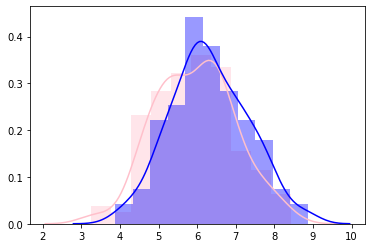

In [11]:
# показатели здоровья, на основе которых делается вывод, простудился ли человек или нет
woman = np.random.normal(6,size = 150)
man = np.random.normal(6.3,size = 210)
sns.distplot(woman,color = 'pink')
sns.distplot(man,color = 'blue')

In [0]:
# 0 - не болеет, 1 - болеет
woman = (woman > 7).astype(int)
man = (man > 7).astype(int)

In [13]:
# считаем z-test ручками
n1,n2 = 150, 210
p_w = np.count_nonzero(woman == 1) # число заболевших женщин
p_m = np.count_nonzero(man == 1) # число заболевших мужчин
p1 = p_w / n1
p2 = p_m / n2
p = (p_w + p_m)/(n1 + n2)

z_stat = (p1 - p2) / (np.sqrt(p*(1-p)*(1/n1 + 1/n2)))
print('z_test ', z_stat)
p_value = scipy.stats.norm.sf(abs(z_stat))*2 
print('p_value ', p_value)

z_test  -2.3368143830226353
p_value  0.019448837637412064


In [14]:
# проверим 
count = np.array([p_w, p_m])
nobs = np.array([n1, n2])
stat, pval = proportions_ztest(count, nobs)
print('z_test {0:0.3f}'.format(stat))
print('p_value {0:0.3f}'.format(pval))

z_test -2.337
p_value 0.019


In [15]:
# вывод
if p_value > alpha:
    print('Не можем отвергнуть нулевую гипотезу о том, что пропорции не имеют значимого различия')
else:
    print('Не можем принять нулевую гипотезу о том, что пропорции не имеют значимого различия')

Не можем принять нулевую гипотезу о том, что пропорции не имеют значимого различия


ПРАВОСТОРОННЯЯ ГИПОТЕЗА \\
Проверим, можно ли сделать заявление, что лекарство эффективнее действует на женщин, p1 - доля простудившихся женщин, p2 - доля простудившихся мужчин. \\
H0: p1<p2 `женщины заражаются меньше` \\
H1: p1>=p2 `женщины заражаются не меньше` \\

In [16]:
# подсчеты аналогичные, только p_value ищется для односторонней гипотезы
z_stat = (p1 - p2) / (np.sqrt(p*(1-p)*(1/n1 + 1/n2)))
print('z_stat ', z_stat)
p_value = scipy.stats.norm.sf(abs(z_stat))
print('p_value ', p_value)

z_stat  -2.3368143830226353
p_value  0.009724418818706032


In [17]:
if p_value > alpha:
    print('Не можем отвергнуть нулевую гипотезу о том, что на женщин лекарство действует эффективнее')
else:
    print('Не можем принять нулевую гипотезу о том, что на женщин лекарство действует эффективнее')

Не можем принять нулевую гипотезу о том, что на женщин лекарство действует эффективнее


Аналогичным образом с левосторнней гипотезой